In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [37]:
df = pd.read_csv('Source/2016_Building_Energy_Benchmarking.csv', sep=",")
df.shape

(3376, 46)

In [38]:
df = df[df['SiteEnergyUseWN(kBtu)'] != 0 ]

In [39]:
df[df['ComplianceStatus'] == 'Non-Compliant']

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
226,350,2016,NonResidential,Large Office,Second And Spring Building,1100 Second Avenue,Seattle,WA,98101.0,0942000045,7,DOWNTOWN,47.60642,-122.33581,1958,1.0,6,172842,25920,146922,"Data Center, Office, Parking",Office,99890.0,Data Center,39336.0,Parking,25000.0,NaN,NaN,297.399994,299.200012,909.599976,911.500000,4.139950e+07,4.165040e+07,0.0,1.166315e+07,39794668.0,16048.309570,1604831.0,False,NaN,Non-Compliant,High outlier,362.66,2.10
384,539,2016,NonResidential,Retail Store,University Center,4501 Roosevelt Way NE,Seattle,WA,98105.0,5335200380,4,NORTHEAST,47.66178,-122.31812,1987,1.0,2,69492,0,69492,Retail Store,Retail Store,69800.0,Other,0.0,NaN,NaN,NaN,100.0,4.600000,4.600000,14.300000,14.300000,3.189628e+05,3.189628e+05,0.0,9.348260e+04,318963.0,0.000000,0.0,False,NaN,Non-Compliant,Low outlier,2.22,0.03
448,608,2016,NonResidential,Large Office,411 1ST AVE S (ID608),411 1ST AVE S,Seattle,WA,98104.0,5247800200,2,DOWNTOWN,47.59878,-122.33458,1913,5.0,7,154159,0,154159,Office,Office,193154.0,NaN,NaN,NaN,NaN,NaN,100.0,58.000000,58.799999,28.000000,28.700001,1.119592e+07,1.134876e+07,0.0,4.715030e+05,1608768.0,3430.500488,343050.0,False,NaN,Non-Compliant,Low outlier,29.43,0.19
517,704,2016,NonResidential,Large Office,401 Elliott Ave West,401 Elliot Ave West,Seattle,WA,98119.0,7666202110,7,MAGNOLIA / QUEEN ANNE,47.62235,-122.36378,2000,1.0,4,129551,42500,87051,"Data Center, Office, Parking",Office,82273.0,Parking,42500.0,Data Center,4778.0,NaN,1.0,311.700012,311.700012,978.900024,978.900024,2.713719e+07,2.713719e+07,0.0,7.953454e+06,27137187.0,0.000000,0.0,False,NaN,Non-Compliant,High outlier,189.18,1.46
578,773,2016,NonResidential,Small- and Mid-Sized Office,SEATTLE BUILDING,215 COLUMBIA ST,Seattle,WA,98104.0,0939000245,7,DOWNTOWN,47.60380,-122.33293,1924,NaN,4,63150,0,63150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,Non-Compliant,NaN,NaN,NaN
720,19708,2016,Multifamily HR (10+),High-Rise Multifamily,Bay Vista,2821 2nd Ave,Seattle,WA,98121.0,0586400000,7,DOWNTOWN,47.61706,-122.35141,1982,1.0,24,167941,0,167941,"Multifamily Housing, Swimming Pool",Multifamily Housing,138787.0,Parking,99952.0,Swimming Pool,0.0,NaN,100.0,17.299999,18.700001,50.400002,54.000000,2.407904e+06,2.589126e+06,0.0,6.265616e+05,2137828.0,2700.760010,270076.0,False,NaN,Non-Compliant,Low outlier,29.25,0.17
758,19798,2016,Multifamily LR (1-4),Low-Rise Multifamily,SANDHURST APTS,7239 SAND POINT WAY NE,Seattle,WA,98115.0,0225049032,4,NORTHEAST,47.68149,-122.26471,1977,NaN,3,33166,0,33166,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,Non-Compliant,NaN,NaN,NaN
834,19934,2016,Multifamily LR (1-4),Low-Rise Multifamily,Belmont Lofts,231 Belmont Ave E,Seattle,WA,98102.0,0704600000,3,EAST,47.62059,-122.32440,1989,1.0,4,31702,0,31702,"Multifamily Housing, Parking",Multifamily Housing,26418.0,Parking,14280.0,NaN,NaN,NaN,NaN,9.700000,10.400000,30.400000,32.700001,2.559712e+05,2.754120e+05,0.0,7.502090e+04,255971.0,0.000000,0.0,False,NaN,Non-Compliant,Low outlier,1.78,0.06
962,20367,2016,Multifamily LR (1-4),Low-Rise Multifamily,City Lights on Harbor,2349 Harbor Ave. SW,Seattle,WA,98126.0,15952

In [40]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing*100))

OSEBuildingID - 0.0%
DataYear - 0.0%
BuildingType - 0.0%
PrimaryPropertyType - 0.0%
PropertyName - 0.0%
Address - 0.0%
City - 0.0%
State - 0.0%
ZipCode - 0.47804003585300264%
TaxParcelIdentificationNumber - 0.0%
CouncilDistrictCode - 0.0%
Neighborhood - 0.0%
Latitude - 0.0%
Longitude - 0.0%
YearBuilt - 0.0%
NumberofBuildings - 0.23902001792650132%
NumberofFloors - 0.0%
PropertyGFATotal - 0.0%
PropertyGFAParking - 0.0%
PropertyGFABuilding(s) - 0.0%
ListOfAllPropertyUseTypes - 0.268897520167314%
LargestPropertyUseType - 0.5975500448162534%
LargestPropertyUseTypeGFA - 0.5975500448162534%
SecondLargestPropertyUseType - 50.044816253361226%
SecondLargestPropertyUseTypeGFA - 50.044816253361226%
ThirdLargestPropertyUseType - 82.22288616671646%
ThirdLargestPropertyUseTypeGFA - 82.22288616671646%
YearsENERGYSTARCertified - 96.50433223782493%
ENERGYSTARScore - 24.589184344188826%
SiteEUI(kBtu/sf) - 0.14938751120406335%
SiteEUIWN(kBtu/sf) - 0.179265013444876%
SourceEUI(kBtu/sf) - 0.268897520167314

In [41]:
# select numeric columns
data_numeric = df.select_dtypes(include=[np.number])
numeric_cols = data_numeric.columns.values

# select non numeric columns
data_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = data_non_numeric.columns.values

In [42]:
data_numeric.describe()

,OSEBuildingID,DataYear,ZipCode,CouncilDistrictCode,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),Comments,TotalGHGEmissions,GHGEmissionsIntensity
count,3347.000000,3347.0,3331.000000,3347.000000,3347.000000,3347.000000,3347.000000,3339.000000,3347.000000,3.347000e+03,3347.000000,3.347000e+03,3.327000e+03,1672.000000,595.000000,2524.000000,3342.000000,3341.000000,3338.000000,3338.000000,3.342000e+03,3.341000e+03,3.338000e+03,3.338000e+03,3.338000e+03,3.338000e+03,3.338000e+03,0.0,3338.000000,3338.000000
mean,21257.604721,2016.0,98116.878115,4.435913,47.623931,-122.334797,1968.550344,1.074573,4.702719,9.143676e+04,7981.199283,8.345556e+04,7.589808e+04,27914.704723,11733.733443,67.899366,54.913914,57.528854,134.767765,138.980977,5.145136e+06,5.322528e+06,2.473960e+05,1.029066e+06,3.511173e+06,1.371974e+04,1.371974e+06,NaN,116.439272,1.180557
std,12130.091321,0.0,18.506865,2.121321,0.047707,0.027179,33.111308,0.929903,5.464038,1.489973e+05,32353.895890,1.322808e+05,1.224348e+05,51968.838940,29355.630146,26.897970,56.249998,57.162309,139.286949,139.116122,1.562392e+07,1.600021e+07,3.640113e+06,2.842230e+06,9.697689e+06,6.735515e+04,6.735516e+06,NaN,506.052872,1.827541
min,1.000000,2016.0,98006.000000,1.000000,47.499170,-122.414250,1900.000000,0.000000,0.000000,1.128500e+04,0.000000,3.636000e+03,5.656000e+03,0.000000,0.000000,1.000000,0.400000,0.400000,0.000000,-2.100000,1.340900e+04,1.340900e+04,0.000000e+00,-3.382680e+04,-1.154170e+05,0.000000e+00,0.000000e+00,NaN,-0.800000,-0.020000
25%,20024.000000,2016.0,98105.000000,3.000000,47.599840,-122.350610,1948.000000,1.000000,2.000000,2.838850e+04,0.000000,2.763950e+04,2.501850e+04,4998.250000,2238.000000,53.000000,28.000000,29.500000,74.900002,78.900002,9.347111e+05,9.903615e+05,0.000000e+00,1.882663e+05,6.423645e+05,0.000000e+00,0.000000e+00,NaN,9.502500,0.210000
50%,23132.000000,2016.0,98115.000000,4.000000,47.618660,-122.332580,1975.000000,1.000000,4.000000,4.396900e+04,0.000000,4.303500e+04,3.960000e+04,10628.000000,5039.000000,75.000000,38.700001,41.099998,96.400002,101.500000,1.809344e+06,1.924436e+06,0.000000e+00,3.449026e+05,1.176808e+06,3.260473e+03,3.260475e+05,NaN,34.025000,0.620000
75%,25995.500000,2016.0,98122.000000,7.000000,47.657095,-122.319522,1997.000000,1.000000,5.000000,9.013300e+04,0.000000,8.399950e+04,7.535450e+04,26469.500000,10080.500000,90.000000,60.400002,64.500000,143.974998,149.100006,4.219434e+06,4.419300e+06,0.000000e+00,8.286832e+05,2.827467e+06,1.191906e+04,1.191906e+06,NaN,93.647500,1.380000
max,50226.000000,2016.0,98272.000000,7.000000,47.733870,-122.220966,2015.000000,27.000000,99.000000,2.200000e+06,512608.000000,2.200000e+06,1.719643e+06,639931.000000,459748.000000,100.000000,834.400024,834.400024,2620.000000,2620.000000,4.483853e+08,4.716139e+08,1.349435e+08,8.046087e+07,2.745325e+08,2.979090e+06,2.979090e+08,NaN,16870.980000,34.090000


In [43]:
data_non_numeric.describe()

,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,TaxParcelIdentificationNumber,Neighborhood,ListOfAllPropertyUseTypes,LargestPropertyUseType,SecondLargestPropertyUseType,ThirdLargestPropertyUseType,YearsENERGYSTARCertified,DefaultData,ComplianceStatus,Outlier
count,3347,3347,3347,3347,3347,3347,3347,3347,3338,3327,1672,595,117,3347,3347,32
unique,8,24,3333,3325,1,1,3242,19,464,55,50,44,64,2,3,2
top,NonResidential,Low-Rise Multifamily,Northgate Plaza,309 South Cloverdale Street,Seattle,WA,0925049346,DOWNTOWN,Multifamily Housing,Multifamily Housing,Parking,Retail Store,2016,False,Compliant,Low outlier
freq,1450,986,3,4,3347,3347,5,567,865,1664,970,110,13,3235,3200,23


[OUTLIER] Clean Outliers based on 'Outlier' columm

In [44]:
df['Outlier'].unique()

array([nan, 'High outlier', 'Low outlier'], dtype=object)

In [45]:
df = df[pd.isna(df['Outlier'])]
df

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7.226362e+06,7.456910e+06,2003882.00,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8.387933e+06,8.664479e+06,0.00,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,7.258702e+07,7.393711e+07,21566554.00,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6.794584e+06,6.946800e+06,2214446.25,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,114.800003,118.699997,211.399994,215.600006,1.417261e+07,1.465650e+07,0.00,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,False,NaN,Compliant,NaN,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,2016,Nonresidential COS,Office,Horticulture building,1600 S Dakota St,Seattle,WA,NaN,1624049080,2,GREATER DUWAMISH,47.56722,-122.31154,1990,1.0,1,12294,0,12294,Office,Office,12294.0,NaN,NaN,NaN,NaN,NaN,46.0,69.099998,76.699997,161.699997,176.100006,8.497457e+05,9.430032e+05,0.00,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,True,NaN,Error - Correct Default Data,NaN,20.94,1.70
3372,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,Seattle,WA,NaN,3558300000,2,DOWNTOWN,47.59625,-122.32283,2004,1.0,1,16000,0,16000,Other - Recreation,Other - Recreation,16000.0,NaN,NaN,NaN,NaN,NaN,NaN,59.400002,65.900002,114.199997,118.900002,9.502762e+05,1.053706e+06,0.00,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,False,NaN,Compliant,NaN,32.17,2.01
3373,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,Seattle,WA,NaN,1794501150,7,MAGNOLIA / QUEEN ANNE,47.63644,-122.35784,1974,1.0,1,13157,0,13157,"Fitness Center/Health Club/Gym, Other - Recreation, Swimming Pool",Other - Recreation,7583.0,Fitness Center/Health Club/Gy

[OUTLIER] Clean the negative values of Traget features

In [46]:
df['GHGEmissionsIntensity'][df['GHGEmissionsIntensity'] < 0 ] = 0
df['Electricity(kWh)'][df['Electricity(kWh)'] < 0 ] = 0
df['TotalGHGEmissions'][df['TotalGHGEmissions'] < 0 ] = 0

In [47]:
index = df['Electricity(kBtu)'][df['Electricity(kBtu)'] < 0 ].index.item()
df.loc[index, ('Electricity(kBtu)')] = 0
print(df['Electricity(kBtu)'][index])

0.0


[COMMENT] Environs 10% des donnees de PropertyGFATotal sont des Outliers selon le boxplot

[OUTLIER] Clean Buildings not compliant to the government requirements

In [48]:
print(round(((df['ComplianceStatus'][df['ComplianceStatus'] == 'Non-Compliant']).count() / df['ComplianceStatus'].count() ) * 100,2))
print(round(((df['ComplianceStatus'][df['ComplianceStatus'] == 'Missing Data']).count() / df['ComplianceStatus'].count() ) * 100,2))

0.15
0.0


[COMMENT] 0.2% des batiments sont non-compliant avec les energy benchmarking requirements, nous allons donc retire ces batiments de l'analyse:

In [49]:
df = df[~(df['ComplianceStatus'] == 'Non-Compliant')]
df = df[~(df['ComplianceStatus'] == 'Missing Data')]
df.shape

(3310, 46)

[OUTLIER] Clean Buildings part of the residual category

In [50]:
def clean_multifamily(dataframe):
    for value in dataframe['PrimaryPropertyType']:
        if('Multifamily' in value):
            dataframe['PrimaryPropertyType'].drop(value, axis=0)

In [51]:
df = df[~df['BuildingType'].str.contains("Multifamily")]
df

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7.226362e+06,7.456910e+06,2003882.00,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8.387933e+06,8.664479e+06,0.00,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,7.258702e+07,7.393711e+07,21566554.00,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6.794584e+06,6.946800e+06,2214446.25,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,114.800003,118.699997,211.399994,215.600006,1.417261e+07,1.465650e+07,0.00,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,False,NaN,Compliant,NaN,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,2016,Nonresidential COS,Office,Horticulture building,1600 S Dakota St,Seattle,WA,NaN,1624049080,2,GREATER DUWAMISH,47.56722,-122.31154,1990,1.0,1,12294,0,12294,Office,Office,12294.0,NaN,NaN,NaN,NaN,NaN,46.0,69.099998,76.699997,161.699997,176.100006,8.497457e+05,9.430032e+05,0.00,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,True,NaN,Error - Correct Default Data,NaN,20.94,1.70
3372,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,Seattle,WA,NaN,3558300000,2,DOWNTOWN,47.59625,-122.32283,2004,1.0,1,16000,0,16000,Other - Recreation,Other - Recreation,16000.0,NaN,NaN,NaN,NaN,NaN,NaN,59.400002,65.900002,114.199997,118.900002,9.502762e+05,1.053706e+06,0.00,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,False,NaN,Compliant,NaN,32.17,2.01
3373,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,Seattle,WA,NaN,1794501150,7,MAGNOLIA / QUEEN ANNE,47.63644,-122.35784,1974,1.0,1,13157,0,13157,"Fitness Center/Health Club/Gym, Other - Recreation, Swimming Pool",Other - Recreation,7583.0,Fitness Center/Health Club/Gy

[NAN] Clean Nans within the dataframe

In [52]:
def clean_nan(dataframe):
    data_numeric = dataframe.select_dtypes(include=[np.number])
    numeric_cols = data_numeric.columns.values

    data_non_numeric = dataframe.select_dtypes(exclude=[np.number])
    non_numeric_cols = data_non_numeric.columns.values

    for col in numeric_cols:
        if col not in ['SecondLargestPropertyUseType','ZipCode','DataYear','YearBuilt','Latitude','Longitude','CouncilDistrictCode','OSEBuildingID', 'SecondLargestPropertyUseTypeGFA','ThirdLargestPropertyUseType','Comments','ThirdLargestPropertyUseTypeGFA']:
            df_wth_nan = dataframe[col].dropna()
            median = df_wth_nan.median()
            print(median)
            dataframe[col] = dataframe[col].fillna(median)
            print(col)
        else:
            dataframe[col] = dataframe[col].fillna(0)
    for col in non_numeric_cols:
        if col == 'ListOfAllPropertyUseTypes':
            for i in dataframe.index:
                dataframe[col]= dataframe[col].apply(
                lambda x: dataframe['PrimaryPropertyType'].iloc(i)
                if pd.isna(x)
                else x)
        if col == 'LargestPropertyUseType':
            for i in dataframe.index:
                dataframe[col]= dataframe[col].apply(
                    lambda x: dataframe['PrimaryPropertyType'].iloc(i)
                    if pd.isna(x)
                    else x)

In [53]:
clean_nan(df)

1.0
NumberofBuildings
2.0
NumberofFloors
49059.0
PropertyGFATotal
0.0
PropertyGFAParking
47037.5
PropertyGFABuilding(s)
43525.5
LargestPropertyUseTypeGFA
73.0
ENERGYSTARScore
52.20000076
SiteEUI(kBtu/sf)
54.79999924
SiteEUIWN(kBtu/sf)
132.1999969
SourceEUI(kBtu/sf)
136.05000305
SourceEUIWN(kBtu/sf)
2609589.5
SiteEnergyUse(kBtu)
2774363.5
SiteEnergyUseWN(kBtu)
0.0
SteamUse(kBtu)
478894.3438
Electricity(kWh)
1633987.5
Electricity(kBtu)
5313.785156
NaturalGas(therms)
531378.5
NaturalGas(kBtu)
50.245000000000005
TotalGHGEmissions
0.89
GHGEmissionsIntensity


In [54]:
df.isna().sum()

OSEBuildingID                         0
DataYear                              0
BuildingType                          0
PrimaryPropertyType                   0
PropertyName                          0
Address                               0
City                                  0
State                                 0
ZipCode                               0
TaxParcelIdentificationNumber         0
CouncilDistrictCode                   0
Neighborhood                          0
Latitude                              0
Longitude                             0
YearBuilt                             0
NumberofBuildings                     0
NumberofFloors                        0
PropertyGFATotal                      0
PropertyGFAParking                    0
PropertyGFABuilding(s)                0
ListOfAllPropertyUseTypes             0
LargestPropertyUseType                0
LargestPropertyUseTypeGFA             0
SecondLargestPropertyUseType        780
SecondLargestPropertyUseTypeGFA       0


In [55]:
df[df['SiteEnergyUseWN(kBtu)'].isna()]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity


In [56]:
for col in df.columns:
    pct_missing = np.mean(df[col].isna())
    print('{} - {}%'.format(col, pct_missing*100))

OSEBuildingID - 0.0%
DataYear - 0.0%
BuildingType - 0.0%
PrimaryPropertyType - 0.0%
PropertyName - 0.0%
Address - 0.0%
City - 0.0%
State - 0.0%
ZipCode - 0.0%
TaxParcelIdentificationNumber - 0.0%
CouncilDistrictCode - 0.0%
Neighborhood - 0.0%
Latitude - 0.0%
Longitude - 0.0%
YearBuilt - 0.0%
NumberofBuildings - 0.0%
NumberofFloors - 0.0%
PropertyGFATotal - 0.0%
PropertyGFAParking - 0.0%
PropertyGFABuilding(s) - 0.0%
ListOfAllPropertyUseTypes - 0.0%
LargestPropertyUseType - 0.0%
LargestPropertyUseTypeGFA - 0.0%
SecondLargestPropertyUseType - 48.029556650246306%
SecondLargestPropertyUseTypeGFA - 0.0%
ThirdLargestPropertyUseType - 78.44827586206897%
ThirdLargestPropertyUseTypeGFA - 0.0%
YearsENERGYSTARCertified - 94.08866995073892%
ENERGYSTARScore - 0.0%
SiteEUI(kBtu/sf) - 0.0%
SiteEUIWN(kBtu/sf) - 0.0%
SourceEUI(kBtu/sf) - 0.0%
SourceEUIWN(kBtu/sf) - 0.0%
SiteEnergyUse(kBtu) - 0.0%
SiteEnergyUseWN(kBtu) - 0.0%
SteamUse(kBtu) - 0.0%
Electricity(kWh) - 0.0%
Electricity(kBtu) - 0.0%
Natural

[COMMENT] Seul les Second & Third largest Property Use Type contiennent des Nans - toutes les autres features sont clean.

In [57]:
df['ProportionParkingGFA'] = round(df['PropertyGFAParking'] / df['PropertyGFATotal'])
# df['Electricity(kBtu/sf)'] = round(df['Electricity(kBtu)'] / df['SiteEnergyUseWN(kBtu)'],2) * df['SiteEUIWN(kBtu/sf)']
# df['NaturalGas(kBtu/sf)'] = round(df['NaturalGas(kBtu)'] / df['SiteEnergyUseWN(kBtu)'],2) * df['SiteEUIWN(kBtu/sf)']
# df['SteamUse(kBtu/sf)'] = (round(df['SteamUse(kBtu)'],2) / round(df['SiteEnergyUseWN(kBtu)'],2)) * round(df['SiteEUIWN(kBtu/sf)'],2)

In [58]:
# df['Electricity(kBtu)'] = df['Electricity(kBtu)'] / df['SiteEnergyUseWN(kBtu)']
# df['NaturalGas(kBtu)'] = round(df['NaturalGas(kBtu)'],2) / round(df['SiteEnergyUseWN(kBtu)'],2)
# df['SteamUse(kBtu)'] = df['SteamUse(kBtu)'] / df['SiteEnergyUseWN(kBtu)']
# df['Waste_energy(kBtu/sf)'] =  (df['SourceEUIWN(kBtu/sf)'] - df['SiteEUIWN(kBtu/sf)'] ) / df['SourceEUIWN(kBtu/sf)']
# df

In [59]:
df['Waste_energy(kBtu/sf)'] =  (df['SourceEUIWN(kBtu/sf)'] - df['SiteEUIWN(kBtu/sf)'] )

In [60]:
df= df[df['Electricity(kBtu)'] < 17500000]

<AxesSubplot:>

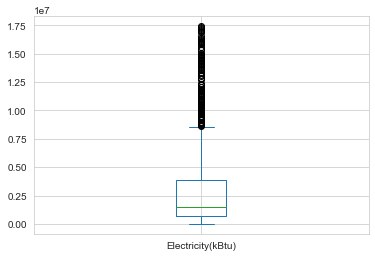

In [61]:
df['Electricity(kBtu)'].plot(kind='box')

In [62]:
labelencoder = LabelEncoder()
df['PrimaryPropertyType_'] = labelencoder.fit_transform(df['PrimaryPropertyType'])
df

/var/folders/lf/xpbzxzn13ss6xxtstbmn6t540000gn/T/ipykernel_97843/2410683671.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PrimaryPropertyType_'] = labelencoder.fit_transform(df['PrimaryPropertyType'])


,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity,ProportionParkingGFA,Waste_energy(kBtu/sf),PrimaryPropertyType_
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,0.0,NaN,0.0,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7.226362e+06,7.456910e+06,2003882.00,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,False,0.0,Compliant,NaN,249.98,2.83,0.0,104.699997,2
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8.387933e+06,8.664479e+06,0.00,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,False,0.0,Compliant,NaN,295.86,2.86,0.0,81.499992,2
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,NaN,0.0,NaN,0.0,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6.794584e+06,6.946800e+06,2214446.25,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,False,0.0,Compliant,NaN,286.43,4.67,0.0,110.699997,2
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,114.800003,118.699997,211.399994,215.600006,1.417261e+07,1.465650e+07,0.00,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,False,0.0,Compliant,NaN,505.01,2.88,0.0,96.900009,2
5,9,2016,Nonresidential COS,Other,West Precinct,810 Virginia St,Seattle,WA,98101.0,0660000560,7,DOWNTOWN,47.61623,-122.33657,1999,1.0,2,97288,37198,60090,Police Station,Police Station,88830.0,NaN,0.0,NaN,0.0,NaN,73.0,136.100006,141.600006,316.299988,320.500000,1.208662e+07,1.258171e+07,0.00,2.160444e+06,7.371434e+06,47151.816410,4.715182e+06,False,0.0,Compliant,NaN,301.81,3.10,0.0,178.899994,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,2016,Nonresidential COS,Office,Horticulture building,1600 S Dakota St,Seattle,WA,0.0,1624049080,2,GREATER DUWAMISH,47.56722,-122.31154,1990,1.0,1,12294,0,12294,Office,Office,12294.0,NaN,0.0,NaN,0.0,NaN,46.0,69.099998,76.699997,161.699997,176.100006,8.497457e+05,9.430032e+05,0.00,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,True,0.0,Error - Correct Default Data,NaN,20.94,1.70,0.0,99.400009,9
3372,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,Seattle,WA,0.0,3558300000,2,DOWNTOWN,47.59625,-122.32283,2004,1.0,1,16000,0,16000,Other - Recreation,Other - Recreation,16000.0,NaN,0.0,NaN,0.0,NaN,73.0,59.400002,65.900002,114.199997,118.900002,9.502762e+05,1.053706e+06,0.00,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,False,0.0,Compliant,NaN,32.17,2.01,0.0,53.000000,10
3373,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,Seattle,WA,0.0,17945011

<AxesSubplot:xlabel='PrimaryPropertyType_', ylabel='SiteEnergyUseWN(kBtu)'>

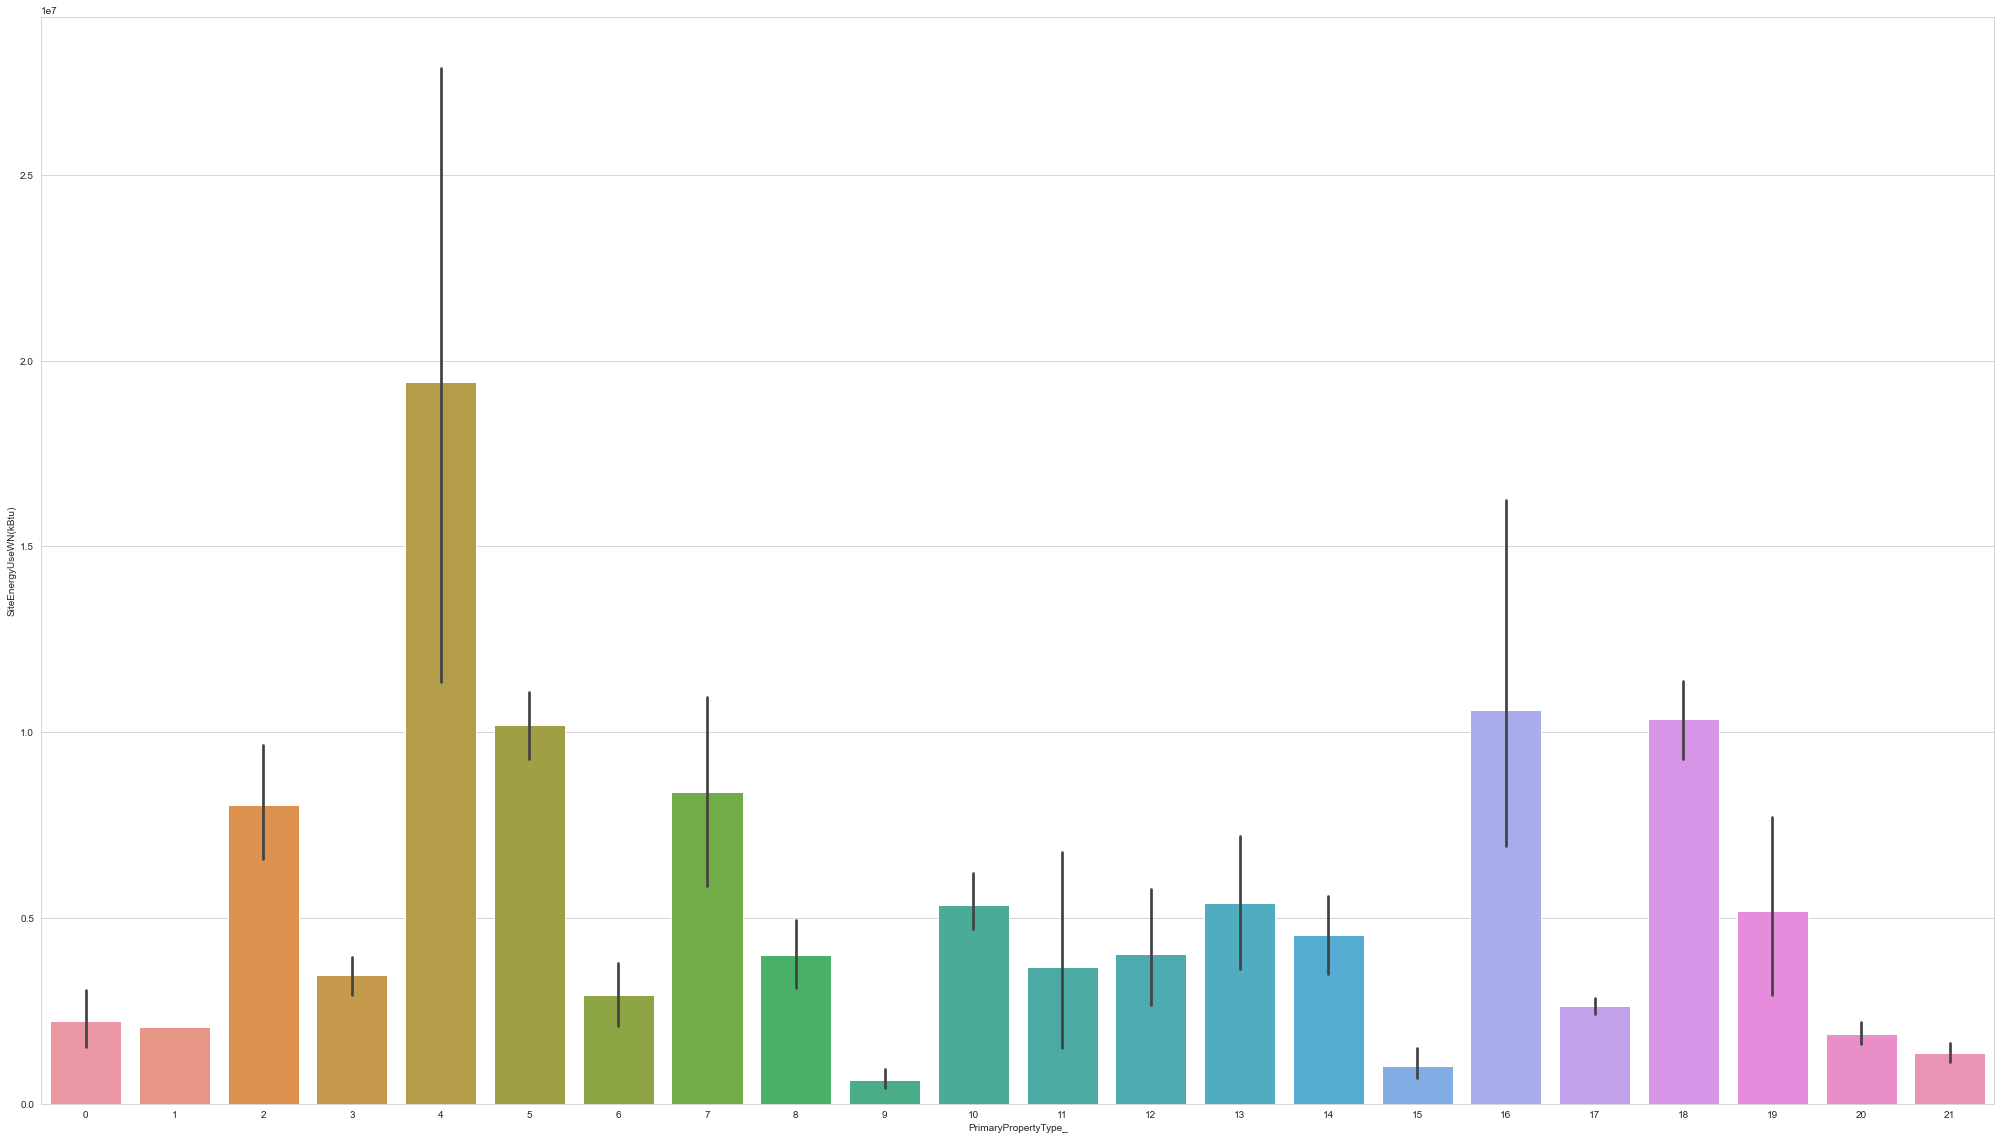

In [63]:
plt.figure(figsize = (35,20))
sns.barplot(x='PrimaryPropertyType_',y='SiteEnergyUseWN(kBtu)',data=df)

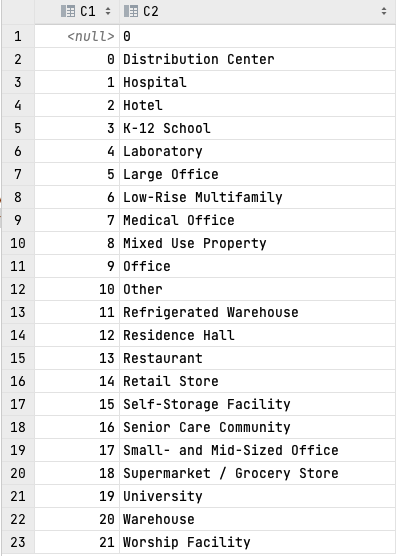

In [64]:
from IPython import display
display.Image("encoder2.png")

[QUESTION] La consommation total d'energie correspond a la somme de la consommation de l'electricite + Steam + NaturalGas
pouvons-nous estimer la consommation de l'energie d'un batiment a partir de sa consommation d'electricite / Steam / Natural Gas?
La consommation d'un batiment depend de :
- le Nombre de batiment qu'un site possede
- Le Gross square foot total de la propriete du batiment
- Largest property use groos foot square

Utiliser les type d'energie pour determiner TotalGHG emissions ainsi que la taille [largestpropertyuse/propertyGFAtotal]



<AxesSubplot:xlabel='PrimaryPropertyType_', ylabel='SiteEnergyUseWN(kBtu)'>

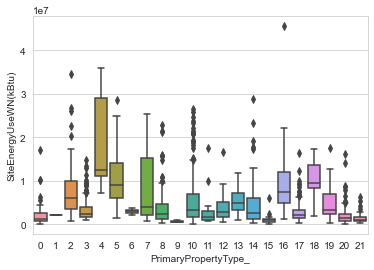

In [65]:
sns.boxplot(data=df, x="PrimaryPropertyType_", y="SiteEnergyUseWN(kBtu)")

<AxesSubplot:xlabel='PrimaryPropertyType_', ylabel='TotalGHGEmissions'>

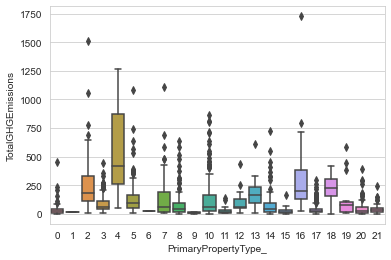

In [66]:
sns.boxplot(data=df, x="PrimaryPropertyType_", y="TotalGHGEmissions")

In [67]:
encoder = LabelEncoder()
df['YearBuilt'] = encoder.fit_transform(df['YearBuilt'])
df

/var/folders/lf/xpbzxzn13ss6xxtstbmn6t540000gn/T/ipykernel_97843/1331171348.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['YearBuilt'] = encoder.fit_transform(df['YearBuilt'])


,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity,ProportionParkingGFA,Waste_energy(kBtu/sf),PrimaryPropertyType_
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,27,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,0.0,NaN,0.0,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7.226362e+06,7.456910e+06,2003882.00,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,False,0.0,Compliant,NaN,249.98,2.83,0.0,104.699997,2
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,93,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8.387933e+06,8.664479e+06,0.00,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,False,0.0,Compliant,NaN,295.86,2.86,0.0,81.499992,2
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,26,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,NaN,0.0,NaN,0.0,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6.794584e+06,6.946800e+06,2214446.25,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,False,0.0,Compliant,NaN,286.43,4.67,0.0,110.699997,2
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,77,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,114.800003,118.699997,211.399994,215.600006,1.417261e+07,1.465650e+07,0.00,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,False,0.0,Compliant,NaN,505.01,2.88,0.0,96.900009,2
5,9,2016,Nonresidential COS,Other,West Precinct,810 Virginia St,Seattle,WA,98101.0,0660000560,7,DOWNTOWN,47.61623,-122.33657,96,1.0,2,97288,37198,60090,Police Station,Police Station,88830.0,NaN,0.0,NaN,0.0,NaN,73.0,136.100006,141.600006,316.299988,320.500000,1.208662e+07,1.258171e+07,0.00,2.160444e+06,7.371434e+06,47151.816410,4.715182e+06,False,0.0,Compliant,NaN,301.81,3.10,0.0,178.899994,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,2016,Nonresidential COS,Office,Horticulture building,1600 S Dakota St,Seattle,WA,0.0,1624049080,2,GREATER DUWAMISH,47.56722,-122.31154,87,1.0,1,12294,0,12294,Office,Office,12294.0,NaN,0.0,NaN,0.0,NaN,46.0,69.099998,76.699997,161.699997,176.100006,8.497457e+05,9.430032e+05,0.00,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,True,0.0,Error - Correct Default Data,NaN,20.94,1.70,0.0,99.400009,9
3372,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,Seattle,WA,0.0,3558300000,2,DOWNTOWN,47.59625,-122.32283,101,1.0,1,16000,0,16000,Other - Recreation,Other - Recreation,16000.0,NaN,0.0,NaN,0.0,NaN,73.0,59.400002,65.900002,114.199997,118.900002,9.502762e+05,1.053706e+06,0.00,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,False,0.0,Compliant,NaN,32.17,2.01,0.0,53.000000,10
3373,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,Seattle,WA,0.0,1794501150,7,MAGNOLIA

In [68]:
dummies = pd.get_dummies(df.PrimaryPropertyType)
df= df.join(dummies).drop('PrimaryPropertyType', axis=1)
df

,OSEBuildingID,DataYear,BuildingType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity,ProportionParkingGFA,Waste_energy(kBtu/sf),PrimaryPropertyType_,Distribution Center,Hospital,Hotel,K-12 School,Laboratory,Large Office,Low-Rise Multifamily,Medical Office,Mixed Use Property,Office,Other,Refrigerated Warehouse,Residence Hall,Restaurant,Retail Store,Self-Storage Facility,Senior Care Community,Small- and Mid-Sized Office,Supermarket / Grocery Store,University,Warehouse,Worship Facility
0,1,2016,NonResidential,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,27,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,0.0,NaN,0.0,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7.226362e+06,7.456910e+06,2003882.00,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,False,0.0,Compliant,NaN,249.98,2.83,0.0,104.699997,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,2016,NonResidential,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,93,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8.387933e+06,8.664479e+06,0.00,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,False,0.0,Compliant,NaN,295.86,2.86,0.0,81.499992,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,5,2016,NonResidential,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,26,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,NaN,0.0,NaN,0.0,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6.794584e+06,6.946800e+06,2214446.25,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,False,0.0,Compliant,NaN,286.43,4.67,0.0,110.699997,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,8,2016,NonResidential,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,77,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,114.800003,118.699997,211.399994,215.600006,1.417261e+07,1.465650e+07,0.00,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,False,0.0,Compliant,NaN,505.01,2.88,0.0,96.900009,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,9,2016,Nonresidential COS,West Precinct,810 Virginia St,Seattle,WA,98101.0,0660000560,7,DOWNTOWN,47.61623,-122.33657,96,1.0,2,97288,37198,60090,Police Station,Police Station,88830.0,NaN,0.0,NaN,0.0,NaN,73.0,136.100006,141.600006,316.299988,320.500000,1.208662e+07,1.258171e+07,0.00,2.160444e+06,7.371434e+06,47151.816410,4.715182e+06,False,0.0,Compliant,NaN,301.81,3.10,0.0,178.899994,10,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,2016,Nonresidential COS,Horticulture building,1600 S Dakota St,Seattle,WA,0.0,1624049080,2,GREATER DUWAMISH,47.56722,-122.31154,87,1.0,1,12294,0,12294,Office,Office,12294.0,NaN,0.0,NaN,0.0,NaN,46.0,69.099998,76.699997,161.699997,176.100006,8.497457e+05,9.430032e+05,0.00,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,True,0.0,E

In [69]:
tmp = df.nunique()
tmp

OSEBuildingID                  1514
DataYear                          1
BuildingType                      5
PropertyName                   1511
Address                        1495
                               ... 
Small- and Mid-Sized Office       2
Supermarket / Grocery Store       2
University                        2
Warehouse                         2
Worship Facility                  2
Length: 70, dtype: int64

In [70]:
cols_1d = tmp[tmp==1].index
df.drop(columns=cols_1d, inplace=True)

In [71]:
cols = ['OSEBuildingID','PropertyName','Address','TaxParcelIdentificationNumber','Neighborhood','ListOfAllPropertyUseTypes','LargestPropertyUseType','SecondLargestPropertyUseType','ThirdLargestPropertyUseType','YearsENERGYSTARCertified','SiteEUI(kBtu/sf)','SourceEUI(kBtu/sf)','SiteEnergyUse(kBtu)','PropertyGFABuilding(s)','Electricity(kWh)','NaturalGas(therms)','DefaultData','ComplianceStatus','BuildingType','Outlier']
df = df.drop(columns=cols)

In [72]:
df

,ZipCode,CouncilDistrictCode,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUIWN(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,ProportionParkingGFA,Waste_energy(kBtu/sf),PrimaryPropertyType_,Distribution Center,Hospital,Hotel,K-12 School,Laboratory,Large Office,Low-Rise Multifamily,Medical Office,Mixed Use Property,Office,Other,Refrigerated Warehouse,Residence Hall,Restaurant,Retail Store,Self-Storage Facility,Senior Care Community,Small- and Mid-Sized Office,Supermarket / Grocery Store,University,Warehouse,Worship Facility
0,98101.0,7,47.61220,-122.33799,27,1.0,12,88434,0,88434.0,0.0,0.0,60.0,84.300003,189.000000,7.456910e+06,2003882.00,3.946027e+06,1.276453e+06,249.98,2.83,0.0,104.699997,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,98101.0,7,47.61317,-122.33393,93,1.0,11,103566,15064,83880.0,15064.0,4622.0,61.0,97.900002,179.399994,8.664479e+06,0.00,3.242851e+06,5.145082e+06,295.86,2.86,0.0,81.499992,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,98101.0,7,47.61412,-122.33664,26,1.0,10,61320,0,61320.0,0.0,0.0,56.0,113.300003,224.000000,6.946800e+06,2214446.25,2.768924e+06,1.811213e+06,286.43,4.67,0.0,110.699997,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,98121.0,7,47.61375,-122.34047,77,1.0,18,175580,62000,123445.0,68009.0,0.0,75.0,118.699997,215.600006,1.465650e+07,0.00,5.368607e+06,8.803998e+06,505.01,2.88,0.0,96.900009,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,98101.0,7,47.61623,-122.33657,96,1.0,2,97288,37198,88830.0,0.0,0.0,73.0,141.600006,320.500000,1.258171e+07,0.00,7.371434e+06,4.715182e+06,301.81,3.10,0.0,178.899994,10,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,0.0,2,47.56722,-122.31154,87,1.0,1,12294,0,12294.0,0.0,0.0,46.0,76.699997,176.100006,9.430032e+05,0.00,5.242709e+05,3.254750e+05,20.94,1.70,0.0,99.400009,9,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3372,0.0,2,47.59625,-122.32283,101,1.0,1,16000,0,16000.0,0.0,0.0,73.0,65.900002,118.900002,1.053706e+06,0.00,3.965461e+05,5.537300e+05,32.17,2.01,0.0,53.000000,10,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3373,0.0,7,47.63644,-122.35784,71,1.0,1,13157,0,7583.0,5574.0,0.0,73.0,460.100006,767.799988,6.053764e+06,0.00,1.792159e+06,3.973739e+06,223.54,16.99,0.0,307.699982,10,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3374,0.0,1,47.52832,-122.32431,86,1.0,1,14101,0,6601.0,6501.0,484.0,73.0,55.500000,110.800003,7.828413e+05,0.00,3.488702e+05,3.706010e+05,22.11,1.57,0.0,55.300003,8,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [73]:
df = df.reset_index(drop=True)
df

,ZipCode,CouncilDistrictCode,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUIWN(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,ProportionParkingGFA,Waste_energy(kBtu/sf),PrimaryPropertyType_,Distribution Center,Hospital,Hotel,K-12 School,Laboratory,Large Office,Low-Rise Multifamily,Medical Office,Mixed Use Property,Office,Other,Refrigerated Warehouse,Residence Hall,Restaurant,Retail Store,Self-Storage Facility,Senior Care Community,Small- and Mid-Sized Office,Supermarket / Grocery Store,University,Warehouse,Worship Facility
0,98101.0,7,47.61220,-122.33799,27,1.0,12,88434,0,88434.0,0.0,0.0,60.0,84.300003,189.000000,7.456910e+06,2003882.00,3.946027e+06,1.276453e+06,249.98,2.83,0.0,104.699997,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,98101.0,7,47.61317,-122.33393,93,1.0,11,103566,15064,83880.0,15064.0,4622.0,61.0,97.900002,179.399994,8.664479e+06,0.00,3.242851e+06,5.145082e+06,295.86,2.86,0.0,81.499992,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,98101.0,7,47.61412,-122.33664,26,1.0,10,61320,0,61320.0,0.0,0.0,56.0,113.300003,224.000000,6.946800e+06,2214446.25,2.768924e+06,1.811213e+06,286.43,4.67,0.0,110.699997,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,98121.0,7,47.61375,-122.34047,77,1.0,18,175580,62000,123445.0,68009.0,0.0,75.0,118.699997,215.600006,1.465650e+07,0.00,5.368607e+06,8.803998e+06,505.01,2.88,0.0,96.900009,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,98101.0,7,47.61623,-122.33657,96,1.0,2,97288,37198,88830.0,0.0,0.0,73.0,141.600006,320.500000,1.258171e+07,0.00,7.371434e+06,4.715182e+06,301.81,3.10,0.0,178.899994,10,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1509,0.0,2,47.56722,-122.31154,87,1.0,1,12294,0,12294.0,0.0,0.0,46.0,76.699997,176.100006,9.430032e+05,0.00,5.242709e+05,3.254750e+05,20.94,1.70,0.0,99.400009,9,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1510,0.0,2,47.59625,-122.32283,101,1.0,1,16000,0,16000.0,0.0,0.0,73.0,65.900002,118.900002,1.053706e+06,0.00,3.965461e+05,5.537300e+05,32.17,2.01,0.0,53.000000,10,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1511,0.0,7,47.63644,-122.35784,71,1.0,1,13157,0,7583.0,5574.0,0.0,73.0,460.100006,767.799988,6.053764e+06,0.00,1.792159e+06,3.973739e+06,223.54,16.99,0.0,307.699982,10,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1512,0.0,1,47.52832,-122.32431,86,1.0,1,14101,0,6601.0,6501.0,484.0,73.0,55.500000,110.800003,7.828413e+05,0.00,3.488702e+05,3.706010e+05,22.11,1.57,0.0,55.300003,8,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [74]:
print()
print("checking for infinity")

ds = df.isin([np.inf, -np.inf])
print(ds)

# printing the count of infinity values
print()
print("printing the count of infinity values")

count = np.isinf(df).values.sum()
print("It contains " + str(count) + " infinite values")

# counting infinity in a particular column name
for col in df.columns:
    c = np.isinf(df[col]).values.sum()
    print(col + "It contains " + str(c) + " infinite values")

# printing column name where infinity is present
print()
print("printing column name where infinity is present")
col_name = df.columns.to_series()[np.isinf(df).any()]
print(col_name)

# printing row index with infinity
print()
print("printing row index with infinity ")

r = df.index[np.isinf(df).any(1)]
print(r)


checking for infinity
      ZipCode  CouncilDistrictCode  Latitude  Longitude  YearBuilt  \
0       False                False     False      False      False   
1       False                False     False      False      False   
2       False                False     False      False      False   
3       False                False     False      False      False   
4       False                False     False      False      False   
...       ...                  ...       ...        ...        ...   
1509    False                False     False      False      False   
1510    False                False     False      False      False   
1511    False                False     False      False      False   
1512    False                False     False      False      False   
1513    False                False     False      False      False   

      NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
0                 False           False             Fal

In [76]:
df['Waste_energy(kBtu/sf)'][df['Waste_energy(kBtu/sf)'] < 0] = 0

/var/folders/lf/xpbzxzn13ss6xxtstbmn6t540000gn/T/ipykernel_97843/1169031460.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Waste_energy(kBtu/sf)'][df['Waste_energy(kBtu/sf)'] < 0] = 0


In [77]:
df.to_csv('data/df_cleaned.csv', index=False)